# Warsztaty KNDS 28.02.2019
## AdaBoost, czyli adaptative boosting

### Wizualizacja

In [3]:
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [4]:
p = np.arange(0.001,1,0.001)
y1 = p
y10 = 1 - norm.cdf(- 10**0.5 / 2 * (2*p-1)/np.sqrt(p*(1-p)))
y100 = 1 - norm.cdf(- 100**0.5 / 2 * (2*p-1)/np.sqrt(p*(1-p)))
y1000 = 1 - norm.cdf(- 1000**0.5 / 2 * (2*p-1)/np.sqrt(p*(1-p)))
y1000000 = 1 - norm.cdf(- 1000000**0.5 / 2 * (2*p-1)/np.sqrt(p*(1-p)))

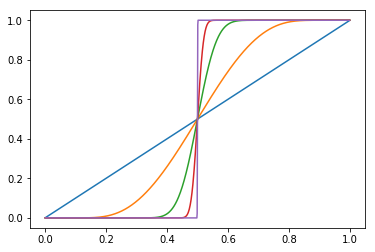

In [8]:
sns.lineplot(p,p)
sns.lineplot(p,y10)
sns.lineplot(p,y100)
sns.lineplot(p,y1000)
sns.lineplot(p,y1000000)

### AdaBoost algorytm

* klasyfikator binarny zwraca 1 i -1
* wagi równe i sumujące się do 1
* dla każdego klasyfikatora:
    * uczymy w sposób ważony na zbiorze uczącym
    * liczymy $y_{pred}$
    * liczymy ważoną stopę błędu $e_i =  \sum w \cdot (y_{pred} != y)$
    * $\alpha_i = 0.5log(\frac{1-e_i}{e_i})$
    * aktualizacja wag: $w:= w \cdot exp(-\alpha_i y_{pred} \cdot y)$
    * normalizacja wag
* $\sum \alpha_i predict(x)$

## AdaBoost implementacja

In [10]:
class AdaBoostKNDS():
    def __init__(self,base_estimator,n_estimator = 50, **kwargs):
        self.base_estimator = base_estimator
        self.n_estimator = n_estimator
        self.kwargs = kwargs
        
    def fit(X,y):
        sample_weight = np.ones(X.shape[0])/X.shape[0]
        
        self.coef = np.empty(self.n_estimator)
        
        self.clf = [self.base_estimator(**kwargs) for i in range(self.n_estimator)]
        
        for i in range(self.n_estimator):
            self.clf[i].fit(X,y,sample_weight)
            y_pred = self.clf[i].predict(X)
            
            w_e = np.sum(w * (y_pred != y))
            self.coef[i] = 0.5 * np.log((1-w_e)/w_e)
            
            sample_weight = sample_weight * np.exp(-self.coef[i] * y_pred * y)
            
            sample_weight = sample_weight / np.sum(sample_weight)
            
    def predict(X):
        result = np.zeros(X.shape[0])
        
        for i in range(self.n_estimator):
            result += self.coef[i] * self.clf[i].predict(X)
            
        return (result>=0).astype(int)

### Plot decision regions

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,clf,resolution=0.02):
    """
    The function plots decision regions on 2D plain given the data to plot: matrix X and vector y;
    and trained classifier clf. The data should be standarized.
    """
    
    # setting constants
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # setting frame sizes
    x1_min, x1_max = X[:,0].min() - 0.25, X[:,0].max() + 0.25
    x2_min, x2_max = X[:,1].min() - 0.25, X[:,1].max() + 0.25
    
    # grid
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    # prediction of every point on the grid
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).transpose())
    Z = Z.reshape(xx1.shape)
    
    # filling regions
    plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # displaying points from X
    for idx, cl in  enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1],
                   alpha=0.8,c=cmap(idx),
                   marker=markers[idx],
                   label=cl, s=2)

## Testy

In [13]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [12]:
cancer = sklearn.datasets.load_breast_cancer()
X = np.array(X)
y = np.array(y)
